In [410]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

# AFL load

In [431]:
exec_name = 'objdump'
path = '/home/david/Documents/gits/CuriousAFL/test/'
aflpath = os.path.join(path, exec_name + '-afl')

In [432]:
dffinal = pd.DataFrame()
for trial in ['','1','2']:
    aflpath = os.path.join(path, exec_name + '-afl' + str(trial))
    df = pd.read_csv(aflpath+'/afl_out/plot_data')
    df['date'] = pd.to_datetime(df['# unix_time'],unit='s')
    df['delta_time'] = df['date']-df['date'][0]
    df = df.set_index('delta_time').resample('5T').mean().reset_index()
    df = df[['delta_time', ' paths_total']]
    df = df.rename(columns={' paths_total': 'cur_path'})
    df['cur_path'] =df['cur_path'].ffill()
    dffinal = dffinal.append(df)

In [433]:
dffinal['event'] = 'AFL'

# Curious load

In [434]:
exec_name = 'objdump'
curiouspath = '/home/david/Documents/gits/fuzztestbench/objdumptower/'


In [435]:
df = pd.read_csv(curiouspath+'/afl_out/plot_data')
df['date'] = pd.to_datetime(df['# unix_time'],unit='s')
df['delta_time'] = df['date']-df['date'][0]
df = df.set_index('delta_time').resample('5T').mean().reset_index()
df = df[['delta_time', ' paths_total']]
df = df.rename(columns={' paths_total': 'cur_path'})
df['cur_path'] =df['cur_path'].ffill()

In [436]:
df['event'] = 'CuriousAFL'
dffinal = dffinal.append(df)

sidenote regarding seaborn https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial  
More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:  
-> set it to standard deviation

In [437]:
dffinal['delta_time'] = dffinal['delta_time'].dt.total_seconds() / 3600

In [438]:
dffinal

,delta_time,cur_path,event
0,0.000000,115.586207,AFL
1,0.083333,275.903846,AFL
2,0.166667,399.215686,AFL
3,0.250000,548.632653,AFL
4,0.333333,717.478261,AFL
5,0.416667,834.692308,AFL
6,0.500000,954.733333,AFL
7,0.583333,1035.272727,AFL
8,0.666667,1116.042553,AFL
9,0.750000,1187.375000,AFL


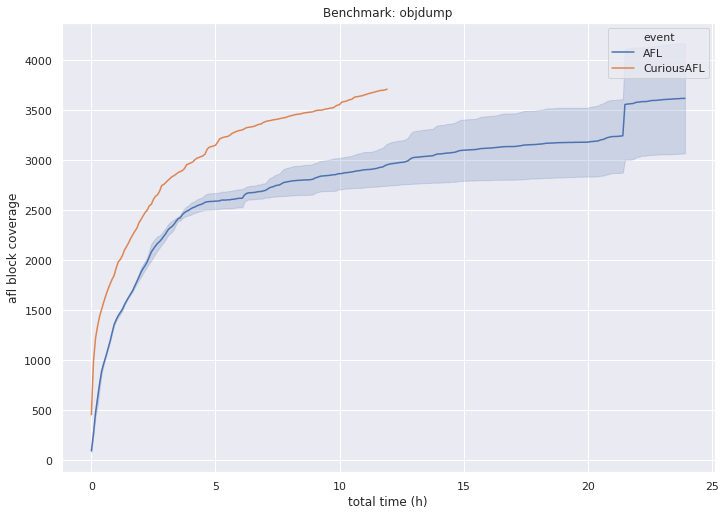

In [439]:
ax = sns.lineplot(x="delta_time", y="cur_path", hue='event', ci=60,data=dffinal)
ax.set(xlabel='total time (h)', ylabel='afl block coverage')

plt.legend()
plt.title('Benchmark: ' + exec_name)
plt.savefig('./'+exec_name+'24h.png', dpi = 200)

# nm

In [441]:
exec_name = 'nm'
path = '/home/david/Documents/gits/CuriousAFL/test/'
aflpath = os.path.join(path, exec_name + '-afl')

In [442]:
dffinal = pd.DataFrame()
for trial in ['','1','2']:
    aflpath = os.path.join(path, exec_name + '-afl' + str(trial))
    df = pd.read_csv(aflpath+'/afl_out/plot_data')
    df['date'] = pd.to_datetime(df['# unix_time'],unit='s')
    df['delta_time'] = df['date']-df['date'][0]
    df = df.set_index('delta_time').resample('5T').mean().reset_index()
    df = df[['delta_time', ' paths_total']]
    df = df.rename(columns={' paths_total': 'cur_path'})
    df['cur_path'] =df['cur_path'].ffill()
    dffinal = dffinal.append(df)

In [443]:
dffinal['event'] = 'AFL'

## curious

In [444]:
curiouspath = '/home/david/Documents/gits/fuzztestbench/nmnew/'


In [445]:
df = pd.read_csv(curiouspath+'/afl_out/plot_data')
df['date'] = pd.to_datetime(df['# unix_time'],unit='s')
df['delta_time'] = df['date']-df['date'][0]
df = df.set_index('delta_time').resample('5T').mean().dropna().reset_index()
df = df[['delta_time', ' paths_total']]
df = df.rename(columns={' paths_total': 'cur_path'})
df['cur_path'] =df['cur_path'].ffill()

In [446]:
df['event'] = 'CuriousAFL'
dffinal = dffinal.append(df)
dffinal['delta_time'] = dffinal['delta_time'].dt.total_seconds() / 3600

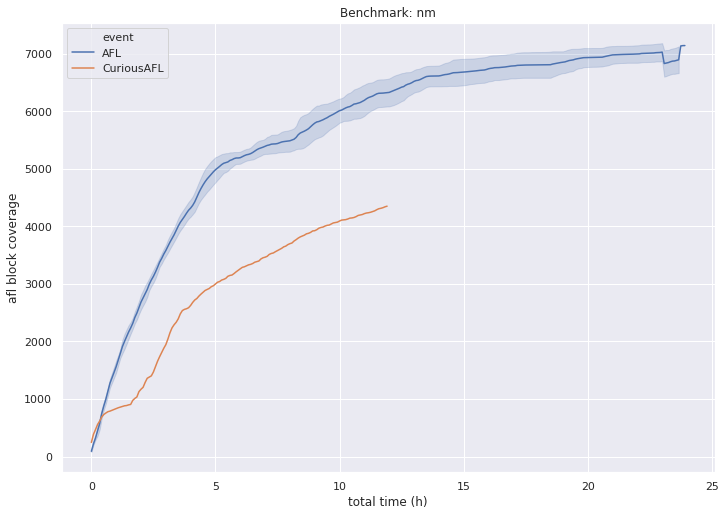

In [447]:
ax = sns.lineplot(x="delta_time", y="cur_path", hue='event', ci=60,data=dffinal)
ax.set(xlabel='total time (h)', ylabel='afl block coverage')

plt.legend()
plt.title('Benchmark: ' + exec_name)
plt.savefig('./'+exec_name+'24h.png', dpi = 200)

# Coverage / time

In [455]:
exec_name = 'objdump'
path = '/home/david/Documents/gits/CuriousAFL/test/'
aflpath = os.path.join(path, exec_name + '-afl')

In [460]:
dffinal = pd.DataFrame()
for trial in ['','1','2']:
    aflpath = os.path.join(path, exec_name + '-afl' + str(trial))
    df = pd.read_csv(aflpath+'/afl_out/plot_data')
    df_helper = pd.DataFrame(np.array(range(df['# unix_time'][0], df['# unix_time'][len(df)-1]+1)))
    df_helper = df_helper.merge(df[['# unix_time', ' execs_per_sec', ' paths_total']], left_on=0, right_on='# unix_time', how='left', left_index=True)
    df_helper.set_index(0, inplace=True)
    del df_helper['# unix_time']
    df_helper[' execs_per_sec'].ffill(inplace=True)
    df_helper['running_exec_sum'] = df_helper[' execs_per_sec'].cumsum()
    df_helper = df_helper[[' paths_total', 'running_exec_sum']]
    
    df_helper['running_exec_sum'] = pd.to_datetime(df_helper['running_exec_sum'], unit='s', origin='unix')
    df = df_helper.set_index('running_exec_sum').resample('100000s').mean().reset_index()
    df['running_exec_sum'] = df.running_exec_sum.astype(int) / 10**9
    df = df.rename(columns={' paths_total': 'cur_path'})
    df['cur_path'] =df['cur_path'].ffill()
    #df = df.rename(columns={' paths_total': 'cur_path'})
    #del df['running_exec_sum']
    dffinal = dffinal.append(df)

In [461]:
dffinal['event'] = 'AFL'

### Curious 

In [463]:
curiouspath = '/home/david/Documents/gits/fuzztestbench/objdumptower/'

In [464]:
df = pd.read_csv(curiouspath+'/afl_out/plot_data')

In [465]:
df_helper = pd.DataFrame(np.array(range(df['# unix_time'][0], df['# unix_time'][len(df)-1]+1)))
df_helper = df_helper.merge(df[['# unix_time', ' execs_per_sec', ' paths_total']], left_on=0, right_on='# unix_time', how='left', left_index=True)
df_helper.set_index(0, inplace=True)
del df_helper['# unix_time']
df_helper[' execs_per_sec'].ffill(inplace=True)
df_helper['running_exec_sum'] = df_helper[' execs_per_sec'].cumsum()
df_helper = df_helper[[' paths_total', 'running_exec_sum']]

In [466]:
df_helper['running_exec_sum'] = pd.to_datetime(df_helper['running_exec_sum'], unit='s', origin='unix')
df = df_helper.set_index('running_exec_sum').resample('100000s').mean().reset_index()
df['running_exec_sum'] = df.running_exec_sum.astype(int) / 10**9
df = df.rename(columns={' paths_total': 'cur_path'})
df['cur_path'] =df['cur_path'].ffill()
df['event'] = 'CuriousAFL'

In [467]:
dffinal = dffinal.append(df)
#dffinal['delta_time'] = dffinal['delta_time'].dt.total_seconds() / 3600

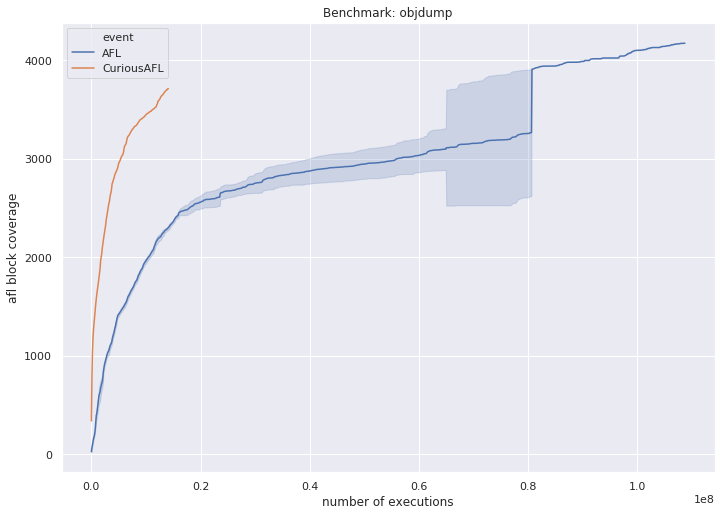

In [469]:
ax = sns.lineplot(x="running_exec_sum", y="cur_path", hue='event', ci=60, data=dffinal)
ax.set(xlabel='number of executions', ylabel='afl block coverage')

plt.legend()
plt.title('Benchmark: ' + exec_name)
plt.savefig('./'+exec_name+'_covtime.png', dpi = 200)

# nm

In [470]:
exec_name = 'nm'
path = '/home/david/Documents/gits/CuriousAFL/test/'
aflpath = os.path.join(path, exec_name + '-afl')

In [471]:
dffinal = pd.DataFrame()
for trial in ['','1','2']:
    aflpath = os.path.join(path, exec_name + '-afl' + str(trial))
    df = pd.read_csv(aflpath+'/afl_out/plot_data')
    df_helper = pd.DataFrame(np.array(range(df['# unix_time'][0], df['# unix_time'][len(df)-1]+1)))
    df_helper = df_helper.merge(df[['# unix_time', ' execs_per_sec', ' paths_total']], left_on=0, right_on='# unix_time', how='left', left_index=True)
    df_helper.set_index(0, inplace=True)
    del df_helper['# unix_time']
    df_helper[' execs_per_sec'].ffill(inplace=True)
    df_helper['running_exec_sum'] = df_helper[' execs_per_sec'].cumsum()
    df_helper = df_helper[[' paths_total', 'running_exec_sum']]
    
    df_helper['running_exec_sum'] = pd.to_datetime(df_helper['running_exec_sum'], unit='s', origin='unix')
    df = df_helper.set_index('running_exec_sum').resample('100000s').mean().reset_index()
    df['running_exec_sum'] = df.running_exec_sum.astype(int) / 10**9
    df = df.rename(columns={' paths_total': 'cur_path'})
    df['cur_path'] =df['cur_path'].ffill()
    #df = df.rename(columns={' paths_total': 'cur_path'})
    #del df['running_exec_sum']
    dffinal = dffinal.append(df)
dffinal['event'] = 'AFL'

In [472]:
curiouspath = '/home/david/Documents/gits/fuzztestbench/nmnew/'

In [473]:
df = pd.read_csv(curiouspath+'/afl_out/plot_data')

In [474]:
df_helper = pd.DataFrame(np.array(range(df['# unix_time'][0], df['# unix_time'][len(df)-1]+1)))
df_helper = df_helper.merge(df[['# unix_time', ' execs_per_sec', ' paths_total']], left_on=0, right_on='# unix_time', how='left', left_index=True)
df_helper.set_index(0, inplace=True)
del df_helper['# unix_time']
df_helper[' execs_per_sec'].ffill(inplace=True)
df_helper['running_exec_sum'] = df_helper[' execs_per_sec'].cumsum()
df_helper = df_helper[[' paths_total', 'running_exec_sum']]

In [475]:
df_helper['running_exec_sum'] = pd.to_datetime(df_helper['running_exec_sum'], unit='s', origin='unix')
df = df_helper.set_index('running_exec_sum').resample('100000s').mean().reset_index()
df['running_exec_sum'] = df.running_exec_sum.astype(int) / 10**9
df = df.rename(columns={' paths_total': 'cur_path'})
df['cur_path'] =df['cur_path'].ffill()
df['event'] = 'CuriousAFL'

In [476]:
dffinal = dffinal.append(df)
#dffinal['delta_time'] = dffinal['delta_time'].dt.total_seconds() / 3600

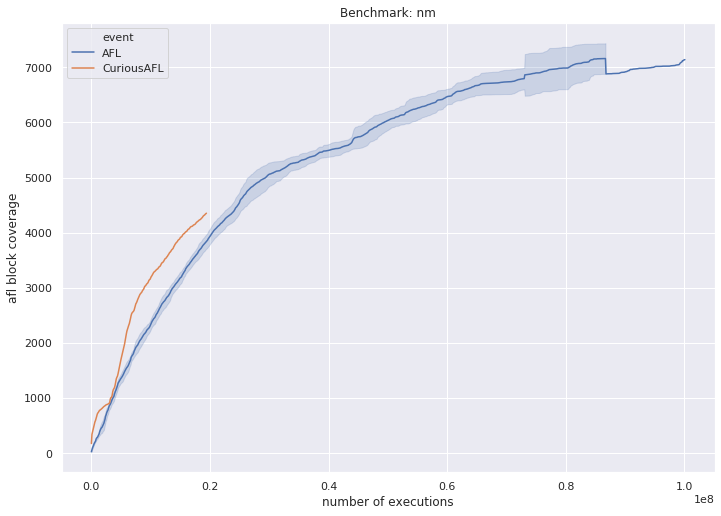

In [477]:
ax = sns.lineplot(x="running_exec_sum", y="cur_path", hue='event', ci=60, data=dffinal)
ax.set(xlabel='number of executions', ylabel='afl block coverage')

plt.legend()
plt.title('Benchmark: ' + exec_name)
plt.savefig('./'+exec_name+'_covtime.png', dpi = 200)

In [190]:
lower, higher = df_helper['running_exec_sum'].min(), df_helper['running_exec_sum'].max()
n_bins = int(higher / 10000)
edges = range(int(lower), int(higher), (int(higher) - int(lower))//n_bins)
lbs = ['(%d, %d]'%(edges[i], edges[i+1]) for i in range(len(edges)-1)]
df_helper['binned_df_pd'] = pd.cut(df_helper.running_exec_sum, bins=n_bins, labels=lbs, include_lowest=True)

In [191]:
df_helper

,paths_total,running_exec_sum,binned_df_pd
0,,,
1567543154,1.0,2000.00,"(2000, 12000]"
1567543155,NaN,4000.00,"(2000, 12000]"
1567543156,NaN,6000.00,"(2000, 12000]"
1567543157,NaN,8000.00,"(2000, 12000]"
1567543158,NaN,10000.00,"(2000, 12000]"
1567543159,41.0,10248.53,"(2000, 12000]"
1567543160,NaN,10497.06,"(2000, 12000]"
1567543161,NaN,10745.59,"(2000, 12000]"
1567543162,NaN,10994.12,"(2000, 12000]"


In [ ]:
    df = df.set_index('delta_time').resample('5T').mean().dropna().reset_index()


In [166]:
df_helper.set_index('running_exec_sum').resample('10K').mean()

ValueError: Invalid frequency: 10000

In [38]:
list(range(1,5)

[1, 2, 3, 4]

In [ ]:
dffinal = pd.DataFrame()
for trial in ['','1','2']:
    aflpath = os.path.join(path, exec_name + '-afl' + str(trial))
    df = pd.read_csv(aflpath+'/afl_out/plot_data')
    df['date'] = pd.to_datetime(df['# unix_time'],unit='s')
    df['delta_time'] = df['date']-df['date'][0]
    df = df.set_index('delta_time').resample('5T').mean().dropna().reset_index()
    df = df[['delta_time', ' paths_total']]
    df = df.rename(columns={' paths_total': 'cur_path'})
    dffinal = dffinal.append(df)